# **Conservatory Group**
# **Project Title: Effects of COVID-19 on Retail Sales in the US**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
file = r"C:\Users\lenpk\OneDrive\Desktop\useful_data\retail_grocery.csv"

In [5]:
retail_grocery = pd.read_csv(file)
retail_grocery.head()

,DATE,RSGCS_20200814,RSGCS_20200916
0,2010-01-01,43028,43028
1,2010-02-01,43735,43735
2,2010-03-01,43304,43304
3,2010-04-01,43186,43186
4,2010-05-01,43266,43266


In [6]:
retail_grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            128 non-null    object
 1   RSGCS_20200814  128 non-null    object
 2   RSGCS_20200916  128 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [17]:
retail_grocery_sept = retail_grocery.drop(['RSGCS_20200814'], axis = 1)
retail_grocery_sept.head()

,DATE,RSGCS_20200916
0,2010-01-01,43028
1,2010-02-01,43735
2,2010-03-01,43304
3,2010-04-01,43186
4,2010-05-01,43266


In [18]:
retail_grocery_sept['RSGCS_20200916'] = retail_grocery_sept['RSGCS_20200916'].astype(int)

retail_grocery_sept['DATE'] = pd.to_datetime(retail_grocery_sept['DATE'])

In [19]:
retail_grocery_sept.rename(columns = {'RSGCS_20200916':'Amount'}, inplace=True)

In [20]:
retail_grocery_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    128 non-null    datetime64[ns]
 1   Amount  128 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 1.6 KB


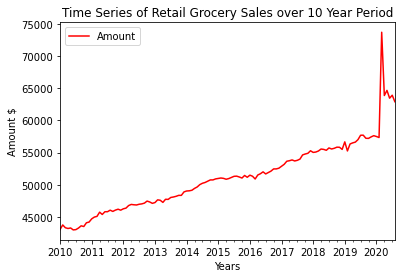

In [27]:
retail_grocery_sept.plot(x='DATE', y='Amount', color='r')
plt.xlabel('Years')
plt.ylabel('Amount $')
plt.title('Time Series of Retail Grocery Sales over 10 Year Period')
plt.show()